In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('D:/데이터/IGAWorks/reserved_encoding_data.csv')

In [3]:
data.head()

,click,event_datetime,bid_id,ssp_id,campaign_id,adset_id,media_id,media_name,media_bundle,media_domain,...,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,device_connection_type_WCK2G73H3A,device_connection_type_aEmZFzgDfq,device_connection_type_else
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,SrN77Arvqh,2T5sOm2MoW,UASfSkWw7S,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,pjBT3sDGbH,...,1,0,0,0,0,1,0,0,0,0
1,0,2019-10-02 01:50:55.776,120KZBpPEp,SrN77Arvqh,2T5sOm2MoW,UASfSkWw7S,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,pjBT3sDGbH,...,1,0,0,0,0,0,1,0,0,0
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,SrN77Arvqh,2T5sOm2MoW,VgrjQr7onn,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,pjBT3sDGbH,...,1,0,0,0,1,0,0,0,0,0
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,Uox85xVMSC,tNKbpmcA5g,qhiItTZT3T,9bC9qJ87qL,YJ1AErf0W7,eQc8dY09AQ,pjBT3sDGbH,...,1,1,0,0,0,0,0,0,0,1
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,SrN77Arvqh,2T5sOm2MoW,VgrjQr7onn,hkFCnTpDpn,Xbdchs5uK3,30Vj8EQm56,pjBT3sDGbH,...,1,0,0,0,0,0,1,0,0,0


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232370 entries, 0 to 2232369
Data columns (total 42 columns):
click                                int64
event_datetime                       object
bid_id                               object
ssp_id                               object
campaign_id                          object
adset_id                             object
media_id                             object
media_name                           object
media_bundle                         object
media_domain                         object
publisher_id                         object
publisher_name                       object
device_ifa                           object
device_os_version                    object
device_model                         object
device_carrier                       object
device_make                          object
device_language                      object
device_region                        object
device_city                          object
advertis

In [6]:
cat_vars = ['ssp_id', 'campaign_id', 'adset_id', 'media_id', 'media_name', 'media_bundle',
'media_domain', 'publisher_id', 'publisher_name', 'device_ifa','device_os_version', 
'device_model', 'device_carrier', 'device_make',  'device_language', 'device_region', 'device_city',
 'advertisement_id', 'install_pack', 'cate_code']

for i in cat_vars:
    df[i] = df[i].astype('category')

In [7]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

In [8]:
X_train = train.iloc[:, 3:]
X_test = test.iloc[:, 3:]
y_train = train['click']
y_test = test['click']

In [9]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1978127, 39)
Number transactions y_train dataset:  (1978127,)
Number transactions X_test dataset:  (254243, 39)
Number transactions y_test dataset:  (254243,)


### model1

In [10]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model1= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model1.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284379	training's binary_logloss: 0.284379	valid_1's binary_logloss: 0.297809	valid_1's binary_logloss: 0.297809
[2]	training's binary_logloss: 0.274536	training's binary_logloss: 0.274536	valid_1's binary_logloss: 0.288366	valid_1's binary_logloss: 0.288366
[3]	training's binary_logloss: 0.267185	training's binary_logloss: 0.267185	valid_1's binary_logloss: 0.281596	valid_1's binary_logloss: 0.281596
[4]	training's binary_logloss: 0.26127	training's binary_logloss: 0.26127	valid_1's binary_logloss: 0.275867	valid_1's binary_logloss: 0.275867
[5]	training's binary_logloss: 0.256408	training's binary_logloss: 0.256408	valid_1's binary_logloss: 0.271148	valid_1's binary_logloss: 0.271148
[6]	training's binary_logloss: 0.25264	training's binary_logloss: 0.25264	valid_1's binary_logloss: 0.267465	valid_1's binary_logloss: 0.267465
[7]	training's binary_logloss: 0.249594	training's binary_logloss: 0.249594	valid_1's binary_logloss: 0.264928	valid_1's binary_

[57]	training's binary_logloss: 0.226228	training's binary_logloss: 0.226228	valid_1's binary_logloss: 0.247328	valid_1's binary_logloss: 0.247328
[58]	training's binary_logloss: 0.226119	training's binary_logloss: 0.226119	valid_1's binary_logloss: 0.247296	valid_1's binary_logloss: 0.247296
[59]	training's binary_logloss: 0.226074	training's binary_logloss: 0.226074	valid_1's binary_logloss: 0.247299	valid_1's binary_logloss: 0.247299
[60]	training's binary_logloss: 0.226003	training's binary_logloss: 0.226003	valid_1's binary_logloss: 0.247289	valid_1's binary_logloss: 0.247289
[61]	training's binary_logloss: 0.225939	training's binary_logloss: 0.225939	valid_1's binary_logloss: 0.247274	valid_1's binary_logloss: 0.247274
[62]	training's binary_logloss: 0.225851	training's binary_logloss: 0.225851	valid_1's binary_logloss: 0.247238	valid_1's binary_logloss: 0.247238
[63]	training's binary_logloss: 0.225793	training's binary_logloss: 0.225793	valid_1's binary_logloss: 0.247219	valid_

[113]	training's binary_logloss: 0.223604	training's binary_logloss: 0.223604	valid_1's binary_logloss: 0.246982	valid_1's binary_logloss: 0.246982
[114]	training's binary_logloss: 0.223564	training's binary_logloss: 0.223564	valid_1's binary_logloss: 0.246988	valid_1's binary_logloss: 0.246988
[115]	training's binary_logloss: 0.22352	training's binary_logloss: 0.22352	valid_1's binary_logloss: 0.247002	valid_1's binary_logloss: 0.247002
[116]	training's binary_logloss: 0.223496	training's binary_logloss: 0.223496	valid_1's binary_logloss: 0.246998	valid_1's binary_logloss: 0.246998
[117]	training's binary_logloss: 0.22346	training's binary_logloss: 0.22346	valid_1's binary_logloss: 0.247014	valid_1's binary_logloss: 0.247014
[118]	training's binary_logloss: 0.223422	training's binary_logloss: 0.223422	valid_1's binary_logloss: 0.247023	valid_1's binary_logloss: 0.247023
[119]	training's binary_logloss: 0.223402	training's binary_logloss: 0.223402	valid_1's binary_logloss: 0.247036	val

[169]	training's binary_logloss: 0.221962	training's binary_logloss: 0.221962	valid_1's binary_logloss: 0.246949	valid_1's binary_logloss: 0.246949
[170]	training's binary_logloss: 0.221955	training's binary_logloss: 0.221955	valid_1's binary_logloss: 0.246956	valid_1's binary_logloss: 0.246956
[171]	training's binary_logloss: 0.221941	training's binary_logloss: 0.221941	valid_1's binary_logloss: 0.246972	valid_1's binary_logloss: 0.246972
[172]	training's binary_logloss: 0.221909	training's binary_logloss: 0.221909	valid_1's binary_logloss: 0.246963	valid_1's binary_logloss: 0.246963
[173]	training's binary_logloss: 0.221892	training's binary_logloss: 0.221892	valid_1's binary_logloss: 0.246967	valid_1's binary_logloss: 0.246967
[174]	training's binary_logloss: 0.221884	training's binary_logloss: 0.221884	valid_1's binary_logloss: 0.246967	valid_1's binary_logloss: 0.246967
[175]	training's binary_logloss: 0.22187	training's binary_logloss: 0.22187	valid_1's binary_logloss: 0.246958	v

[225]	training's binary_logloss: 0.220796	training's binary_logloss: 0.220796	valid_1's binary_logloss: 0.247032	valid_1's binary_logloss: 0.247032
[226]	training's binary_logloss: 0.22079	training's binary_logloss: 0.22079	valid_1's binary_logloss: 0.247026	valid_1's binary_logloss: 0.247026
[227]	training's binary_logloss: 0.220782	training's binary_logloss: 0.220782	valid_1's binary_logloss: 0.247019	valid_1's binary_logloss: 0.247019
[228]	training's binary_logloss: 0.220773	training's binary_logloss: 0.220773	valid_1's binary_logloss: 0.24702	valid_1's binary_logloss: 0.24702
[229]	training's binary_logloss: 0.220765	training's binary_logloss: 0.220765	valid_1's binary_logloss: 0.247033	valid_1's binary_logloss: 0.247033
[230]	training's binary_logloss: 0.220731	training's binary_logloss: 0.220731	valid_1's binary_logloss: 0.247048	valid_1's binary_logloss: 0.247048
[231]	training's binary_logloss: 0.22072	training's binary_logloss: 0.22072	valid_1's binary_logloss: 0.24705	valid_

[281]	training's binary_logloss: 0.219698	training's binary_logloss: 0.219698	valid_1's binary_logloss: 0.247169	valid_1's binary_logloss: 0.247169
[282]	training's binary_logloss: 0.219685	training's binary_logloss: 0.219685	valid_1's binary_logloss: 0.247162	valid_1's binary_logloss: 0.247162
[283]	training's binary_logloss: 0.21967	training's binary_logloss: 0.21967	valid_1's binary_logloss: 0.247151	valid_1's binary_logloss: 0.247151
[284]	training's binary_logloss: 0.21963	training's binary_logloss: 0.21963	valid_1's binary_logloss: 0.24716	valid_1's binary_logloss: 0.24716
[285]	training's binary_logloss: 0.219595	training's binary_logloss: 0.219595	valid_1's binary_logloss: 0.247148	valid_1's binary_logloss: 0.247148
[286]	training's binary_logloss: 0.219568	training's binary_logloss: 0.219568	valid_1's binary_logloss: 0.247148	valid_1's binary_logloss: 0.247148
[287]	training's binary_logloss: 0.21956	training's binary_logloss: 0.21956	valid_1's binary_logloss: 0.247152	valid_1

[337]	training's binary_logloss: 0.218652	training's binary_logloss: 0.218652	valid_1's binary_logloss: 0.247078	valid_1's binary_logloss: 0.247078
[338]	training's binary_logloss: 0.218645	training's binary_logloss: 0.218645	valid_1's binary_logloss: 0.247075	valid_1's binary_logloss: 0.247075
[339]	training's binary_logloss: 0.218633	training's binary_logloss: 0.218633	valid_1's binary_logloss: 0.247077	valid_1's binary_logloss: 0.247077
[340]	training's binary_logloss: 0.218632	training's binary_logloss: 0.218632	valid_1's binary_logloss: 0.247081	valid_1's binary_logloss: 0.247081
[341]	training's binary_logloss: 0.218609	training's binary_logloss: 0.218609	valid_1's binary_logloss: 0.247078	valid_1's binary_logloss: 0.247078
[342]	training's binary_logloss: 0.218596	training's binary_logloss: 0.218596	valid_1's binary_logloss: 0.247075	valid_1's binary_logloss: 0.247075
[343]	training's binary_logloss: 0.218581	training's binary_logloss: 0.218581	valid_1's binary_logloss: 0.247076

[393]	training's binary_logloss: 0.217799	training's binary_logloss: 0.217799	valid_1's binary_logloss: 0.247113	valid_1's binary_logloss: 0.247113
[394]	training's binary_logloss: 0.217784	training's binary_logloss: 0.217784	valid_1's binary_logloss: 0.247119	valid_1's binary_logloss: 0.247119
[395]	training's binary_logloss: 0.217771	training's binary_logloss: 0.217771	valid_1's binary_logloss: 0.247119	valid_1's binary_logloss: 0.247119
[396]	training's binary_logloss: 0.217762	training's binary_logloss: 0.217762	valid_1's binary_logloss: 0.247121	valid_1's binary_logloss: 0.247121
[397]	training's binary_logloss: 0.217752	training's binary_logloss: 0.217752	valid_1's binary_logloss: 0.247124	valid_1's binary_logloss: 0.247124
[398]	training's binary_logloss: 0.217744	training's binary_logloss: 0.217744	valid_1's binary_logloss: 0.247124	valid_1's binary_logloss: 0.247124
[399]	training's binary_logloss: 0.217724	training's binary_logloss: 0.217724	valid_1's binary_logloss: 0.247122

[449]	training's binary_logloss: 0.216987	training's binary_logloss: 0.216987	valid_1's binary_logloss: 0.247175	valid_1's binary_logloss: 0.247175
[450]	training's binary_logloss: 0.216976	training's binary_logloss: 0.216976	valid_1's binary_logloss: 0.247182	valid_1's binary_logloss: 0.247182
[451]	training's binary_logloss: 0.216953	training's binary_logloss: 0.216953	valid_1's binary_logloss: 0.247187	valid_1's binary_logloss: 0.247187
[452]	training's binary_logloss: 0.216941	training's binary_logloss: 0.216941	valid_1's binary_logloss: 0.247187	valid_1's binary_logloss: 0.247187
[453]	training's binary_logloss: 0.21694	training's binary_logloss: 0.21694	valid_1's binary_logloss: 0.247189	valid_1's binary_logloss: 0.247189
[454]	training's binary_logloss: 0.216931	training's binary_logloss: 0.216931	valid_1's binary_logloss: 0.247192	valid_1's binary_logloss: 0.247192
[455]	training's binary_logloss: 0.216928	training's binary_logloss: 0.216928	valid_1's binary_logloss: 0.247197	v

LGBMClassifier(bagging_fraction=0.8, bagging_freq=20, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.2319,
               importance_type='split', learning_rate=0.1, max_bin=500,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=50, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [11]:
from sklearn.metrics import log_loss

lg_loan_status_probas = model1.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24726753000521143


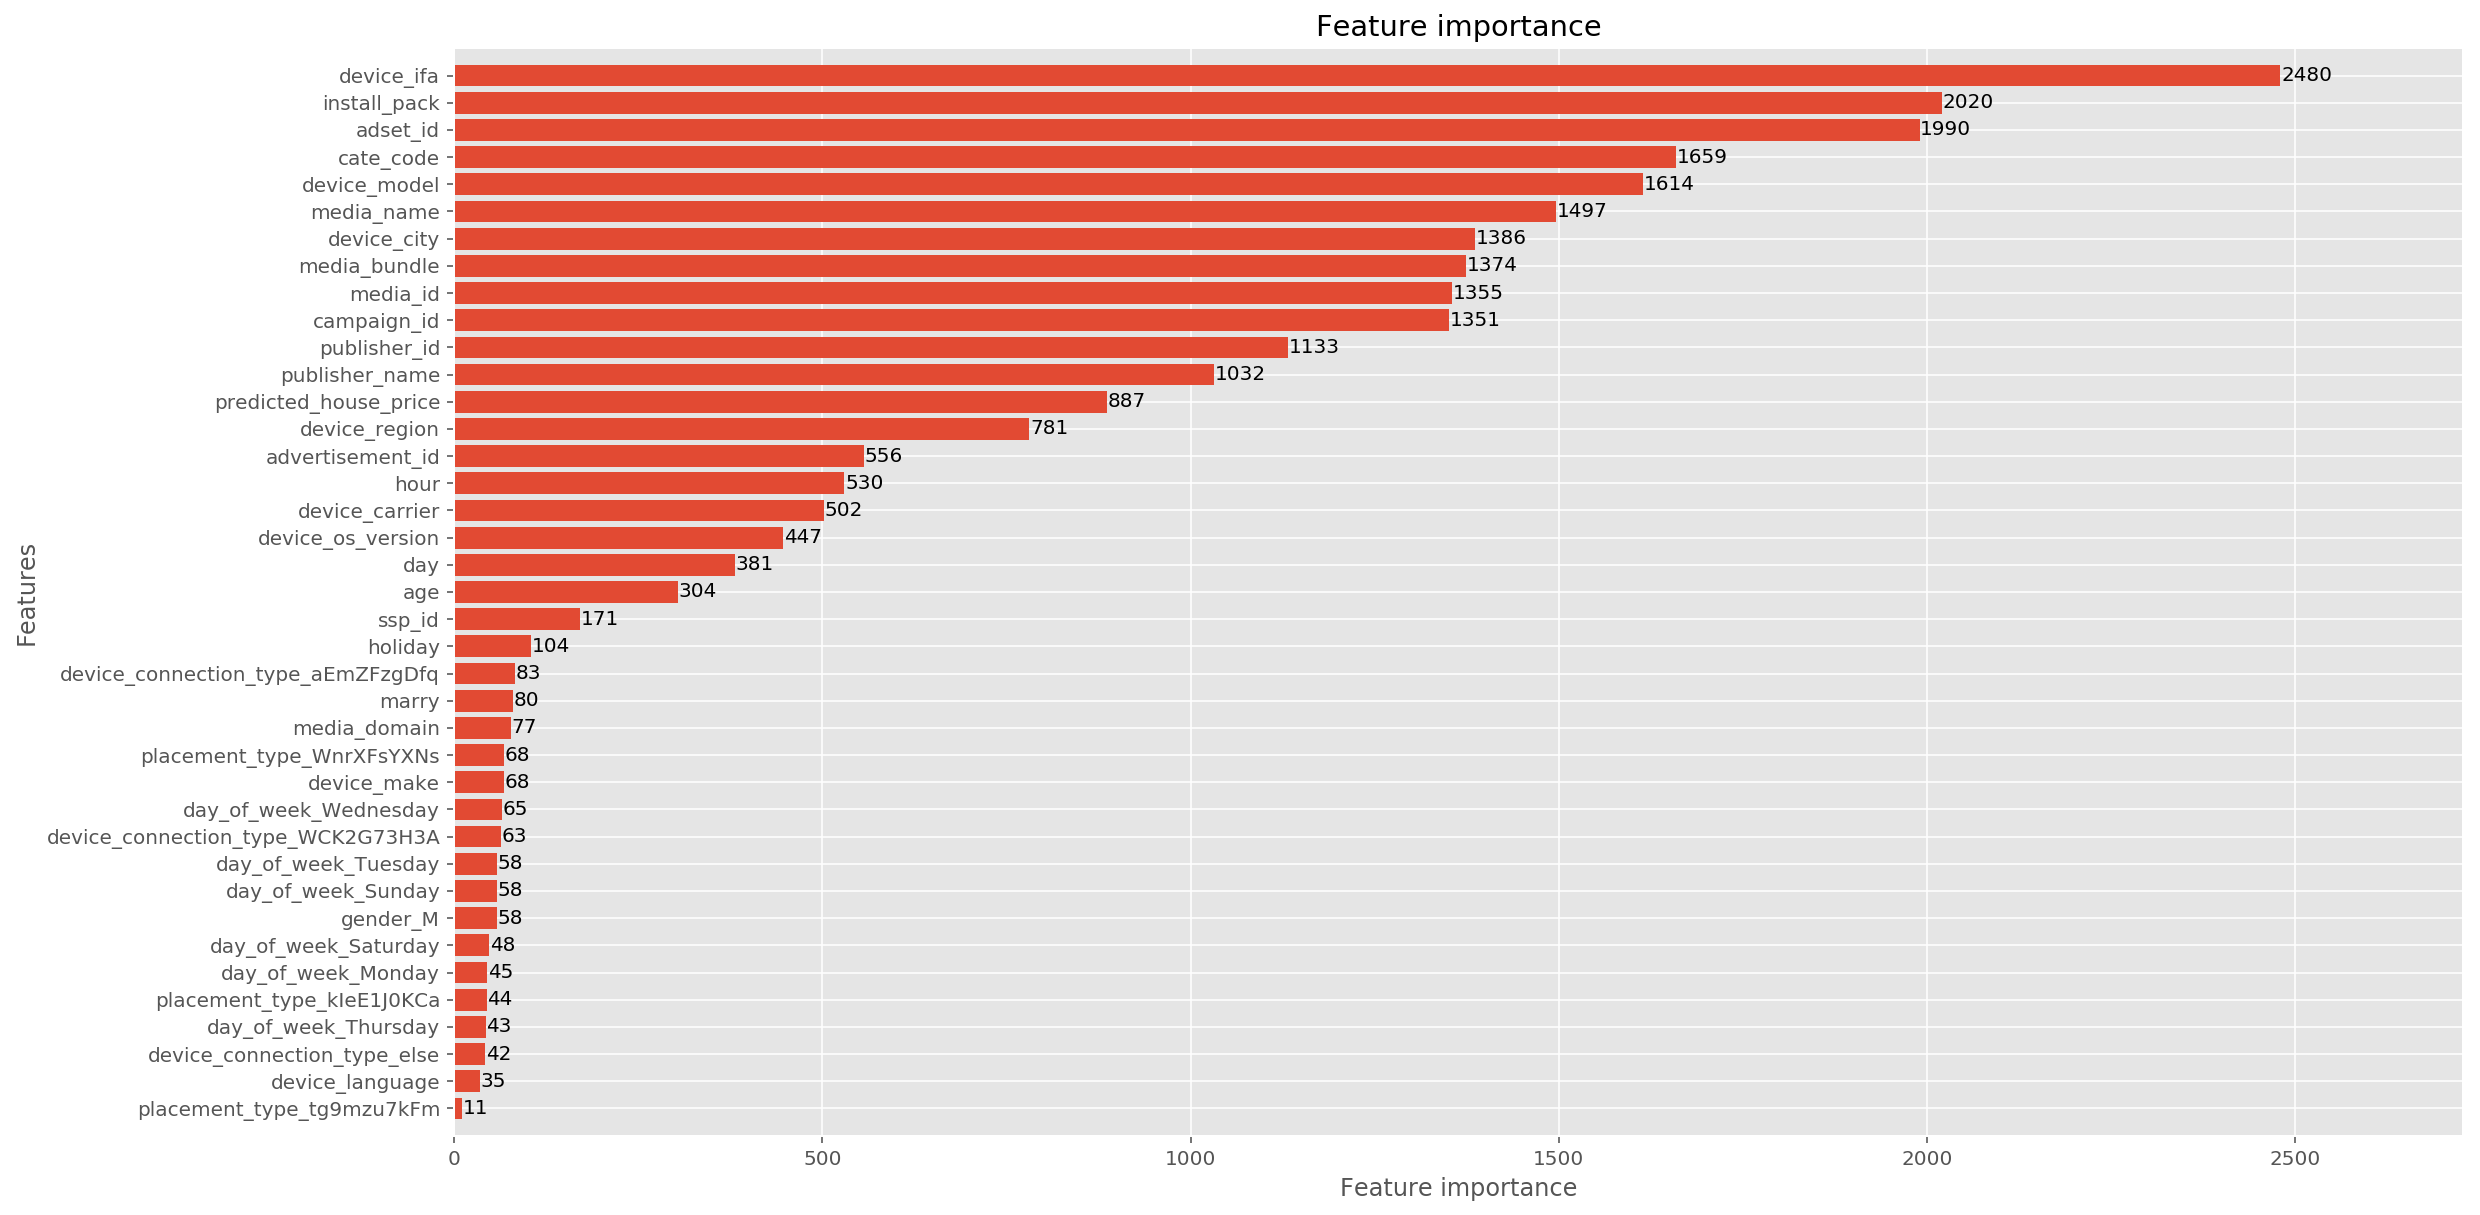

In [12]:
lightgbm.plot_importance(model1, max_num_features  = 100, ignore_zero=True, figsize = (18, 10), height=0.8)

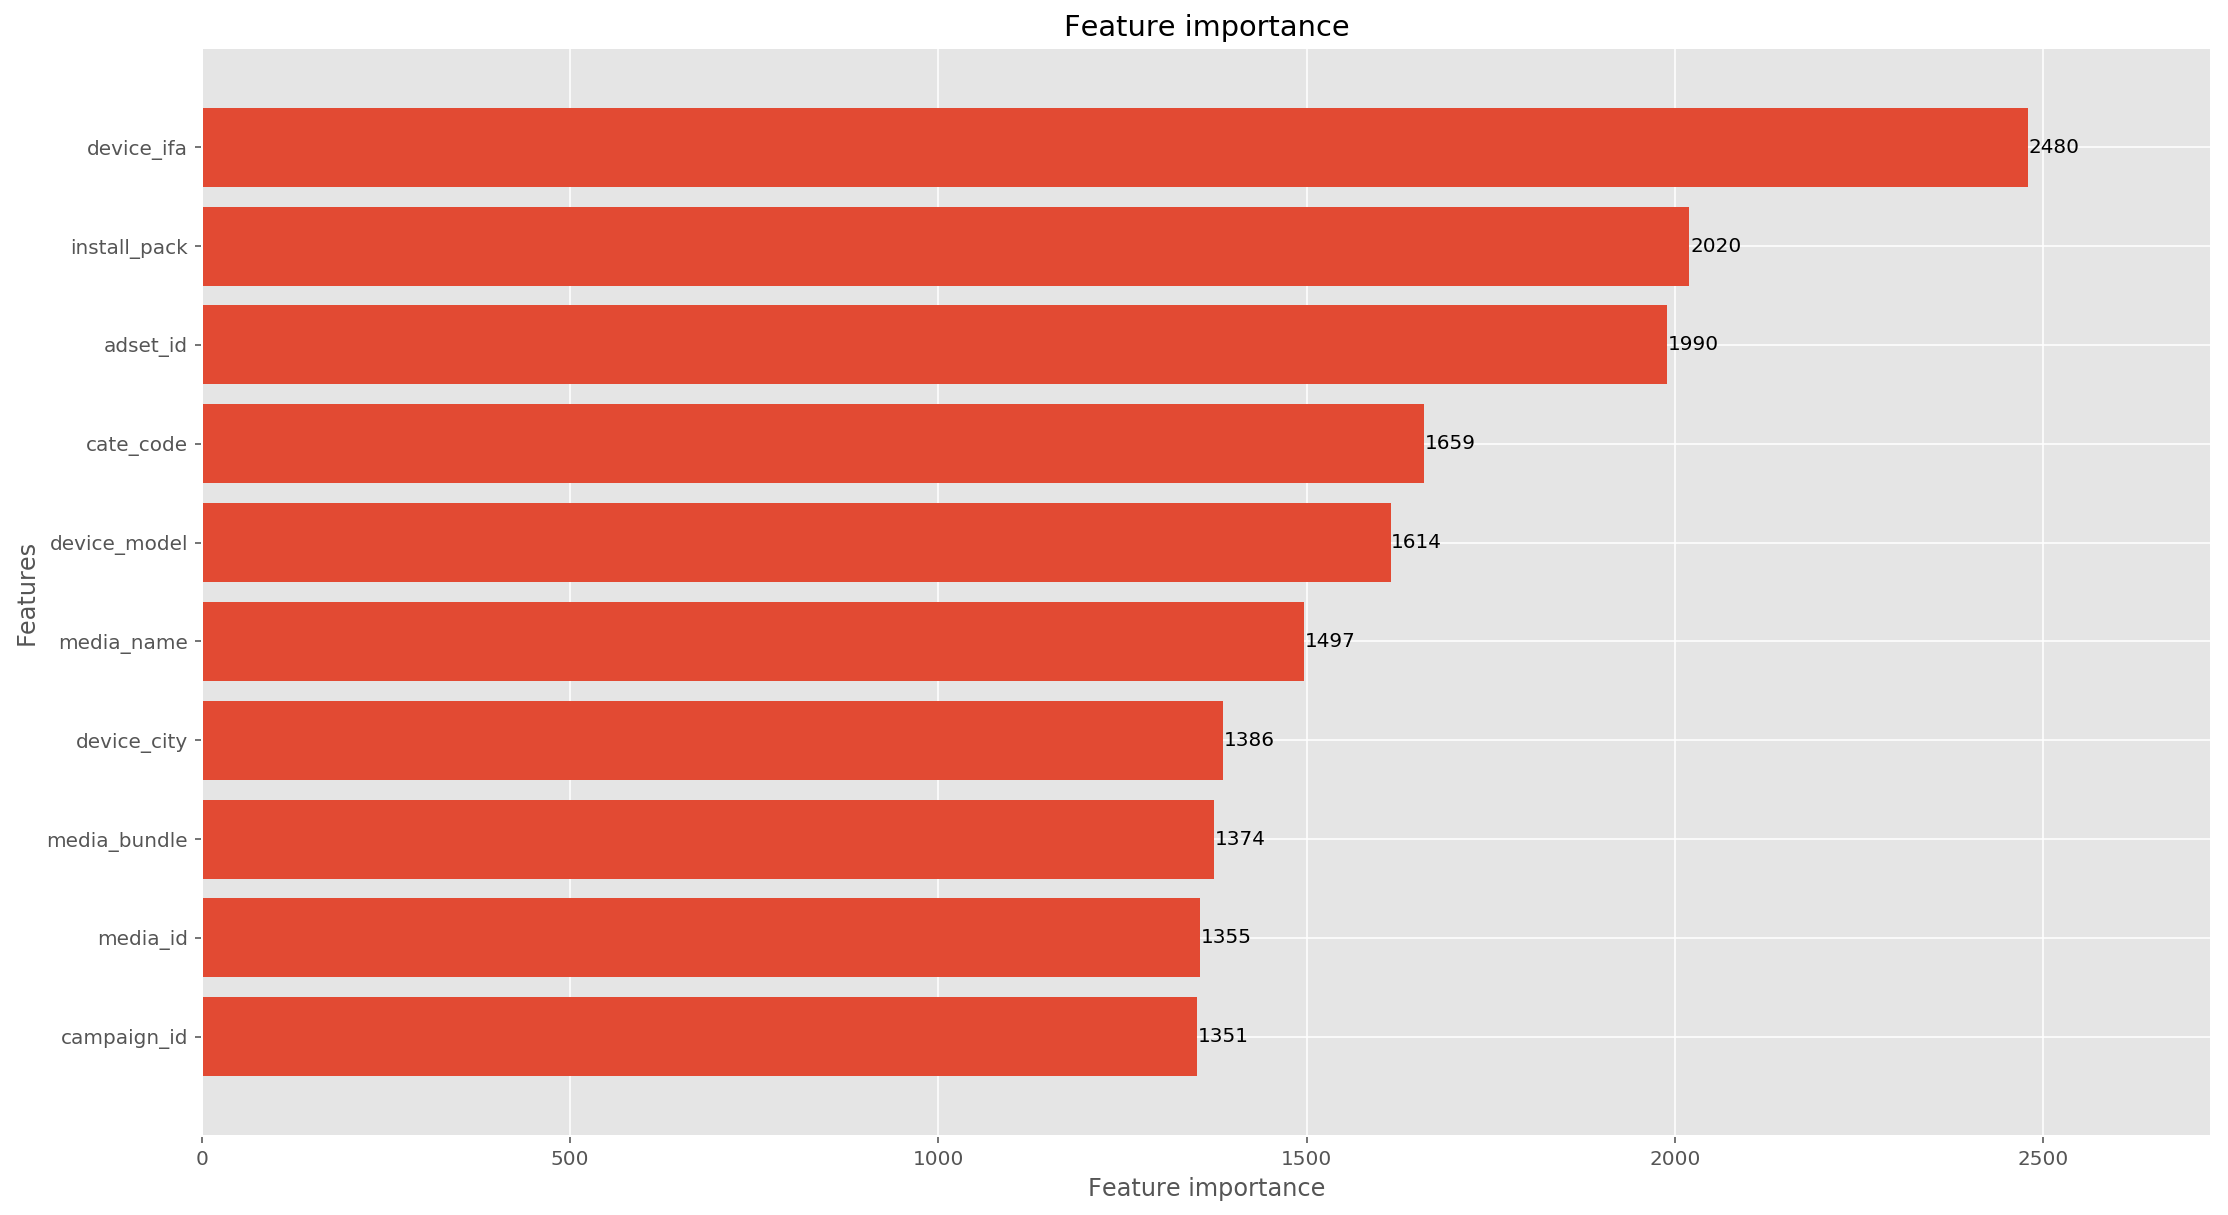

In [13]:
lightgbm.plot_importance(model1, max_num_features  = 10, ignore_zero=True, figsize = (18, 10), height=0.8)

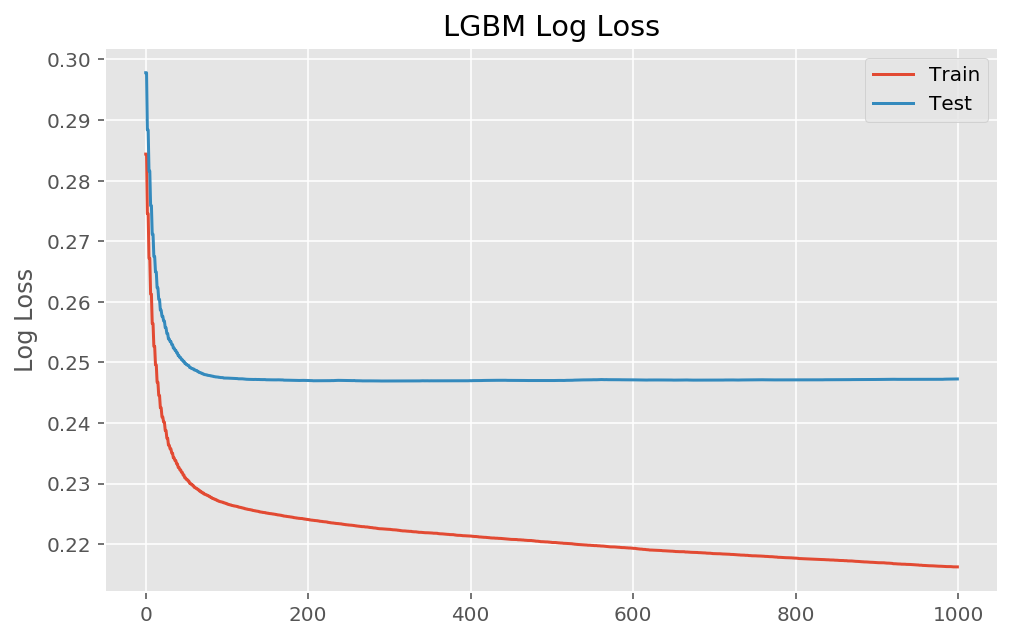

In [14]:
# retrieve performance metrics
results = model1.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

### model2 : SelectFromModel feature selection 진행 -> 성능 더 안좋아짐

In [ ]:
from sklearn.feature_selection import SelectFromModel

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

lgbc= lightgbm.LGBMClassifier(**params)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(X_train.columns))
embeded_lgb_selector.fit(X_train, y_train)

In [ ]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

In [ ]:
embeded_lgb_feature

In [ ]:
X_train = X_train[embeded_lgb_feature]
X_test = X_test[embeded_lgb_feature]

In [ ]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model2= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model2.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [ ]:
lg_loan_status_probas = model2.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

### model3 : model1에서 SMOTE를 통한 데이터 불균형 해결 (over sampling)

In [ ]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

#### - train 데이터에서 클릭 / 비클릭 비율 확인 -> class가 매우 편향적

In [ ]:
train[train['click'] == 1].shape

In [ ]:
train[train['click'] == 0].shape

In [ ]:
# 클릭 비율
174207 / (174207 + 1803920)*100 

In [ ]:
# 비클릭 비율
1803920 / (174207 + 1803920)*100 

#### - SMOTE를 통한 데이터 불균형 해결 (over sampling)

In [ ]:
train.index=range(0, len(train))

In [ ]:
train.head()

In [ ]:
X_train = np.array(train.ix[:, 3:])
y_train = np.array(train.ix[:, 0])
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))

In [ ]:
X_test = np.array(test.ix[:, 3:])
y_test = np.array(test.ix[:, 0])

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, ratio='auto', kind='regular')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=train.iloc[:, 3:].columns)
X_test = pd.DataFrame(X_test, columns= train.iloc[:, 3:].columns)

In [ ]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model3= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train_res, y_train_res), (X_test, y_test)]
model3.fit(X_train_res, y_train_res, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [ ]:
lg_loan_status_probas = model3.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

### model4 : model1에서 SMOTE를 통한 데이터 불균형 해결 (over sampling) -> ratio 조절

In [ ]:
X_train = np.array(train.ix[:, 3:])
y_train = np.array(train.ix[:, 0])

X_test = np.array(test.ix[:, 3:])
y_test = np.array(test.ix[:, 0])

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, ratio=0.3, kind='regular')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=train.iloc[:, 3:].columns)
X_test = pd.DataFrame(X_test, columns= train.iloc[:, 3:].columns)

In [ ]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model4= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train_res, y_train_res), (X_test, y_test)]
model4.fit(X_train_res, y_train_res, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [ ]:
lg_loan_status_probas = model4.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

#### - 아래 그래프와 같이 overfitting 확인 

In [ ]:
# retrieve performance metrics
results = model4.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()